# Decompiler and Circuit Optimizer

Qlasskit offers two useful tool for circuit analysis and optimization.

- Decompiler: given a quantum circuit is able to detect section that can be represented as boolean expressions
- circuit_boolean_optimizer: a pipeline that given a quantum circuit, decompose it in boolean expressions form and optimize it using boolean algebra

We first write a qlasskit function that perform an And between the elements of a Qlist; we use the `fastOptimizer` in order to obtain an unoptimized circuit.

In [2]:
from qlasskit import qlassfa, qlassf, boolopt, Qlist
from qlasskit.decompiler import Decompiler, circuit_boolean_optimizer


@qlassfa(bool_optimizer=boolopt.fastOptimizer)
def qf(a: Qlist[bool, 2]) -> bool:
    s = True
    for i in a:
        s = s and i
    return s


qf.circuit()

QCircuit<qf>(7 gates, 6 qubits)

As we can see from the circuit, this is not the best solution.

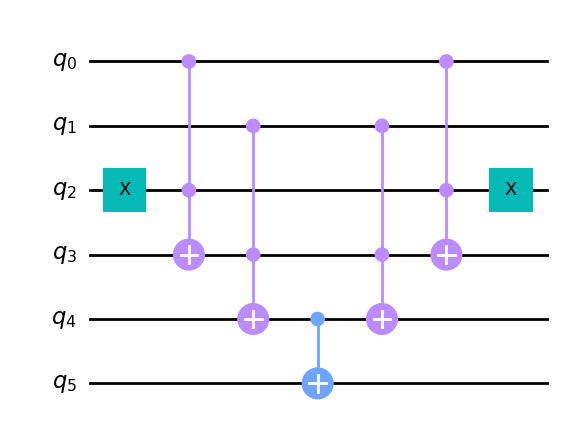

In [3]:
qf.export().draw("mpl")

Using the decompiler we are able to translate a quantum circuit to its boolean representation (if applicable):

In [4]:
dc = Decompiler().decompile(qf.circuit())
dc

DecompiledResults[
	(
		(0, 7)
		(X, [2], None), (CCX, [0, 2, 3], None), (CCX, [1, 3, 4], None), (CX, [4, 5], None), (CCX, [1, 3, 4], None), (CCX, [0, 2, 3], None), (X, [2], None)
		(q5, q4 ^ q5 ^ (q1 & (q3 ^ (q0 & ~q2))))
	)
]

The `circuit_boolean_optimizer` allows us to perform boolean optimizations in a quantum circuit; from the previous unoptimized example, we get the following optimized circuit:

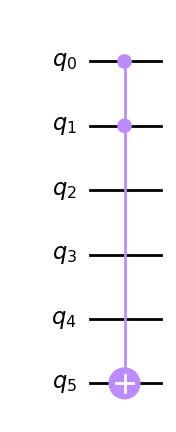

In [8]:
qc = circuit_boolean_optimizer(qf.circuit(), preserve=[0, 1])
qc.export().draw("mpl")